Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sampleimg:  (512, 512, 3)


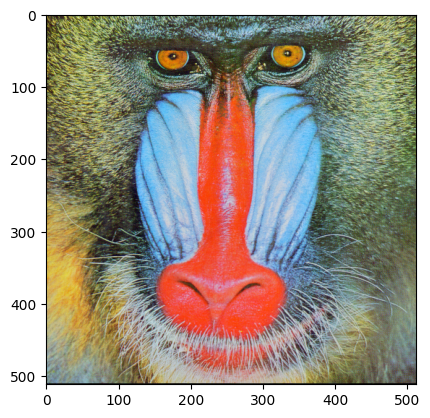

In [25]:
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path # ファイルシステム
from google.colab import drive # Google drive
drive.mount('/content/drive')
p = Path('/content/drive/My Drive/iicex/')  # 画像ファイルのフォルダ
#list( p.iterdir() )  # フォルダの内容をリストにする


from skimage import io # 入出力ライブラリの読み込み
sampleimg = io.imread('/content/drive/My Drive/iicex/baboon.png')  # 画像ファイルの読み込み
print("sampleimg: ", sampleimg.shape)
#print(sampleimg)
plt.imshow(sampleimg)


Yimg.shape:  (512, 512, 3)
averages:  [129.1192894  115.76695633 151.21218872]
removedRimgs[0]:  (512, 512, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

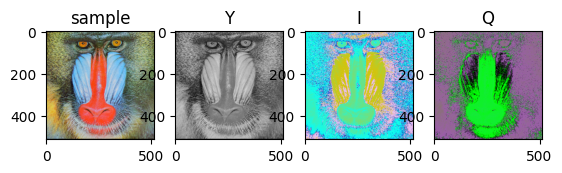

In [28]:
RtoY = np.array([ [0.299, 0.587, 0.114], [0.596, -0.274, -0.322], [0.211, -0.523, 0.312]])
YtoR = np.array([ [1, 0.956, 0.621], [1, -0.273, -0.647], [1, -1.104, 1.70]])
"""
print("sampleimg[0, 0, :]: ", sampleimg[0, 0, :])
print(YtoR * [1,2,3])             #これは行列の積ではない!!!!!
print(np.dot(YtoR, [1,2,3]))      #こっちが行列の積
"""


Yimg =  np.array( [ [np.dot(RtoY, sampleimg[i, j, :]) for j in range(512)]for i in range(512)], dtype='uint8')
print("Yimg.shape: ", Yimg.shape)
#print(Yimg)



averages = np.zeros(3)
for k in range(3):
  arrayk = np.array([[ Yimg[i,j, k] for j in range(512)]for i in range(512) ])
  listk = np.ravel(arrayk)      #2次元を横に並べて1次元化
  averages[k] = sum(listk)/ len(listk)       #つまり各YIQの平均値をとる
print("averages: ",averages)



import copy
removedYimgs = [ copy.copy( Yimg ) for k in range (3)]     #参照渡しをするな‼コピーしたものを渡す
removedRimgs = [[] for k in range(3)]

for k in range(3):
  for j in range(512):
    for i in range(512):

      removedYimgs[k][i, j, ( k+1 ) % 3] = 0 #averages[ ( k+1 ) % 3] #残りの2つを平均値にとる場合
      removedYimgs[k][i, j, ( k+2 ) % 3] = 0 #averages[ ( k+2 ) % 3]

  removedRimgs[k] = np.array( [ [np.dot(YtoR, removedYimgs[k][i, j, :]) for j in range(512)]for i in range(512)], dtype='uint8')

print("removedRimgs[0]: ", (removedRimgs[0]).shape)

"""
print(Rimgs[0].shape)
print(Rimgs[0][0, 0, 0])
print(Rimgs[0])
plt.imshow(Rimgs[0][:, :, :])
"""


fig = plt.figure()
axes = [ [] for i in range(4)]



#plt.imshow(removedRimgs[0])

axes[0] = fig.add_subplot(1, 4, 1) #figureの位置番号は1から始まる
axes[0].set_title("sample")

titles = ["Y", "I", "Q"]
for k in range(3): #ちなrangeのスライスはrange(2,5)のよにする
  axes[k+1] = fig.add_subplot(1, 4, k+2)
  axes[k+1].set_title(titles[k])  #axesはsampleimgを含むが、titlesは含まない。インデックス注意


#print(axes[0])
axes[0].imshow(sampleimg)
for k in range(3):
  axes[k+1].imshow(removedRimgs[k])

plt.show
